## Pto 3 Catalina Millan

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = np.loadtxt("/home/catalina/Desktop/Programas/stellar_radius.dat") # Carga el archivo como un arreglo de numeros
t_desord=[data[i-1:i,0:1][0][0] for i in range(1,len(data)+1)]
R_desord=[data[i-1:i,1:2][0][0] for i in range(1,len(data)+1)]

x_list,y_list=zip(*sorted(zip(t_desord,R_desord)))

In [8]:
n = len(x_list)-1 #3/h[] n=3

x = np.zeros(n+1)

a = np.zeros(n+1)
b = np.zeros(n+1)
c = np.zeros(n+1)
d = np.zeros(n+1)

l  = np.zeros(n+1)
mu = np.zeros(n+1)
z  = np.zeros(n+1)

va = np.zeros(n+1)

h = np.zeros(n)


for i in range(0,len(x)):
    x[i] = x_list[i]
    a[i] = y_list[i]

#step 1

for i in range(0,n):
    h[i]=x[i+1]-x[i]

#step 2

for i in range(1,n):
    va[i] = 3/h[i] * (a[i+1]-a[i]) - 3/h[i-1] * (a[i]-a[i-1])
    
#step 3, solucion del sistema de ecuaciones lineales


l[0] = 1
mu[0] = 0
z[0] = 0

for i in range(1,n):
    l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
    mu[i] = h[i]/l[i]
    z[i] = (va[i]-h[i-1]*z[i-1])/l[i]
        
l[n] = 1
z[n] = 0
c[n] = 0

for j in range(n-1,-1,-1):
    c[j] = z[j]-mu[j]*c[j+1]
    b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
    d[j] = (c[j+1]-c[j])/(3*h[j])
    

#print("aj = ",a)
#print("bj = ",b)
#print("cj = ",c)
#print("dj = ",d)
    

104857
5000


ValueError: x and y must have same first dimension, but have shapes (5000,) and (104857,)

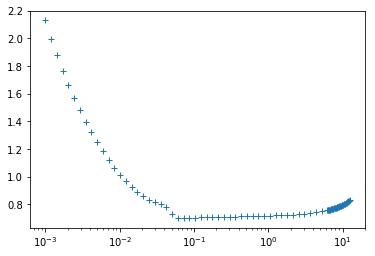

In [9]:
x_array = np.linspace(min(x_list),max(x_list),5000)
y_array = []

for i in range(0,len(x_array)):
    for j in range(0,n):
        if x[j]<=x_array[i]<x[j+1]:
            s = a[j]+b[j]*(x_array[i]-x[j]) + c[j]*(x_array[i]-x[j])**2 + d[j]*(x_array[i]-x[j])**3
            y_array.append(s)
    if x_array[i]==x[n]:
        s = a[n]+b[n]*(x_array[i]-x[n]) + c[n]*(x_array[i]-x[n])**2 + d[n]*(x_array[i]-x[n])**3
        y_array.append(s)

print(len(y_array))
print(len(x_array))
fig=plt.figure()
ax=plt.axes()
plt.xscale('log')
ax.plot(x_list,y_list,'+')
ax.plot(x_array,y_array)
plt.show()